# Arima (ARIMA)

## Importing Necessary Modules

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

## Importing and Processing Data

In [3]:
df = pd.read_csv('regular_dataset_r3_2xlarge_us-east-1b.csv')
df

,Unnamed: 0,Time,Price
0,0,2021-04-03,0.137033
1,1,2021-04-04,0.137575
2,2,2021-04-05,0.138600
3,3,2021-04-06,0.139000
4,4,2021-04-07,0.140125
...,...,...,...
81,81,2021-06-23,0.158100
82,82,2021-06-24,0.157633
83,83,2021-06-25,0.158100
84,84,2021-06-26,0.157200


In [4]:
df = df.drop("Unnamed: 0", axis=1)
df

,Time,Price
0,2021-04-03,0.137033
1,2021-04-04,0.137575
2,2021-04-05,0.138600
3,2021-04-06,0.139000
4,2021-04-07,0.140125
...,...,...
81,2021-06-23,0.158100
82,2021-06-24,0.157633
83,2021-06-25,0.158100
84,2021-06-26,0.157200


In [5]:
df.describe()

,Price
count,86.000000
mean,0.148951
std,0.004974
min,0.137033
25%,0.145317
50%,0.149721
75%,0.152087
max,0.158100


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    86 non-null     object 
 1   Price   86 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.5+ KB


In [7]:
df['Time'] = pd.to_datetime(df.Time)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Time    86 non-null     datetime64[ns]
 1   Price   86 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.5 KB


In [8]:
df.head()

,Time,Price
0,2021-04-03,0.137033
1,2021-04-04,0.137575
2,2021-04-05,0.138600
3,2021-04-06,0.139000
4,2021-04-07,0.140125


In [9]:
df.set_index('Time', inplace=True)

In [10]:
df.head()

,Price
Time,
2021-04-03,0.137033
2021-04-04,0.137575
2021-04-05,0.138600
2021-04-06,0.139000
2021-04-07,0.140125


## Visualising Data

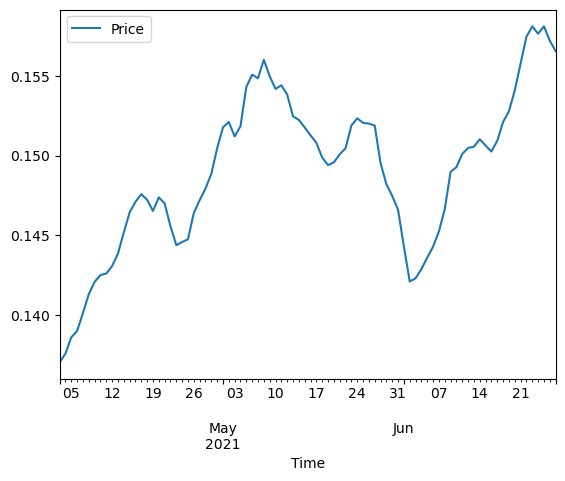

In [11]:
df.plot()
plt.show()

## Checking Stationarity

In [12]:
from pmdarima.arima import ADFTest

In [13]:
adf_test = ADFTest(alpha=0.05)
print(adf_test)
adf_test.should_diff(df)

ADFTest()


(0.3323894950878278, True)

## Train and Test Split

In [14]:
n = int(len(df) * 0.8)

In [15]:
train = df.Price[:n]
test = df.Price[n:]
print(f"For Training\n{train}\n")
print(f"For Testing\n{test}")

For Training
Time
2021-04-03    0.137033
2021-04-04    0.137575
2021-04-05    0.138600
2021-04-06    0.139000
2021-04-07    0.140125
                ...   
2021-06-05    0.143600
2021-06-06    0.144280
2021-06-07    0.145233
2021-06-08    0.146625
2021-06-09    0.148975
Name: Price, Length: 68, dtype: float64

For Testing
Time
2021-06-10    0.149267
2021-06-11    0.150100
2021-06-12    0.150475
2021-06-13    0.150550
2021-06-14    0.151020
2021-06-15    0.150625
2021-06-16    0.150250
2021-06-17    0.150920
2021-06-18    0.152100
2021-06-19    0.152775
2021-06-20    0.154075
2021-06-21    0.155767
2021-06-22    0.157440
2021-06-23    0.158100
2021-06-24    0.157633
2021-06-25    0.158100
2021-06-26    0.157200
2021-06-27    0.156550
Name: Price, dtype: float64


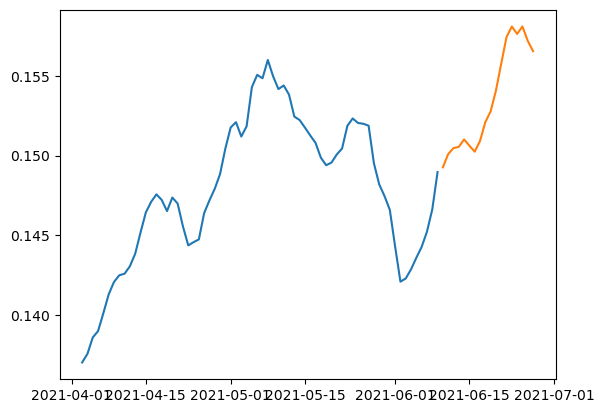

In [16]:
plt.plot(train)
plt.plot(test)
plt.show()

## Arima Model

In [18]:
arima_model=auto_arima (train, start_p=3, d=1, start_q=3, max_p=3,
                        max_d=1, max_q=3, start_P=0, D=1, start_Q=0,
                        max_P=5, max_D=5, max_Q=5, m=4, seasonal=False,
                        error_action='warn', trace = True, 
                        supress_warnings=True, stepwise = True, 
                        random_state=20,n_fits = 50 )

/Users/tej/anaconda3/lib/python3.11/site-packages/pmdarima/arima/_validation.py:62: UserWarning: m (4) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-748.467, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-730.467, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-755.371, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-753.823, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-730.400, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-753.889, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-754.742, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-724.464, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-756.482, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-754.944, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-755.744, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-754.259, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-724.403, Time=0.01 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 0.262 seconds


## Forecasting

In [19]:
prediction = pd.DataFrame(arima_model.predict(n_periods=18), 
                          index=test.index)
prediction_columns = ['predicted_price']
prediction

,0
Time,
2021-06-10,0.150414
2021-06-11,0.151295
2021-06-12,0.151834
2021-06-13,0.152165
2021-06-14,0.152367
2021-06-15,0.152491
2021-06-16,0.152566
2021-06-17,0.152613
2021-06-18,0.152641


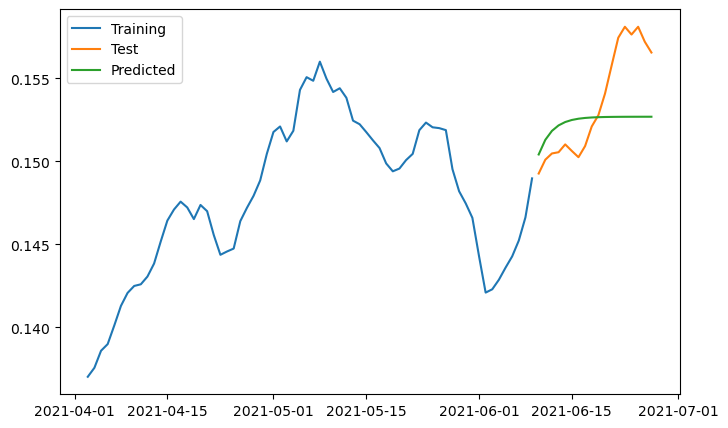

In [20]:
plt.figure(figsize=(8, 5))
plt.plot(train, label="Training")
plt.plot(test, label='Test')
plt.plot(prediction, label="Predicted")
plt.legend(loc="upper left")
plt.show()

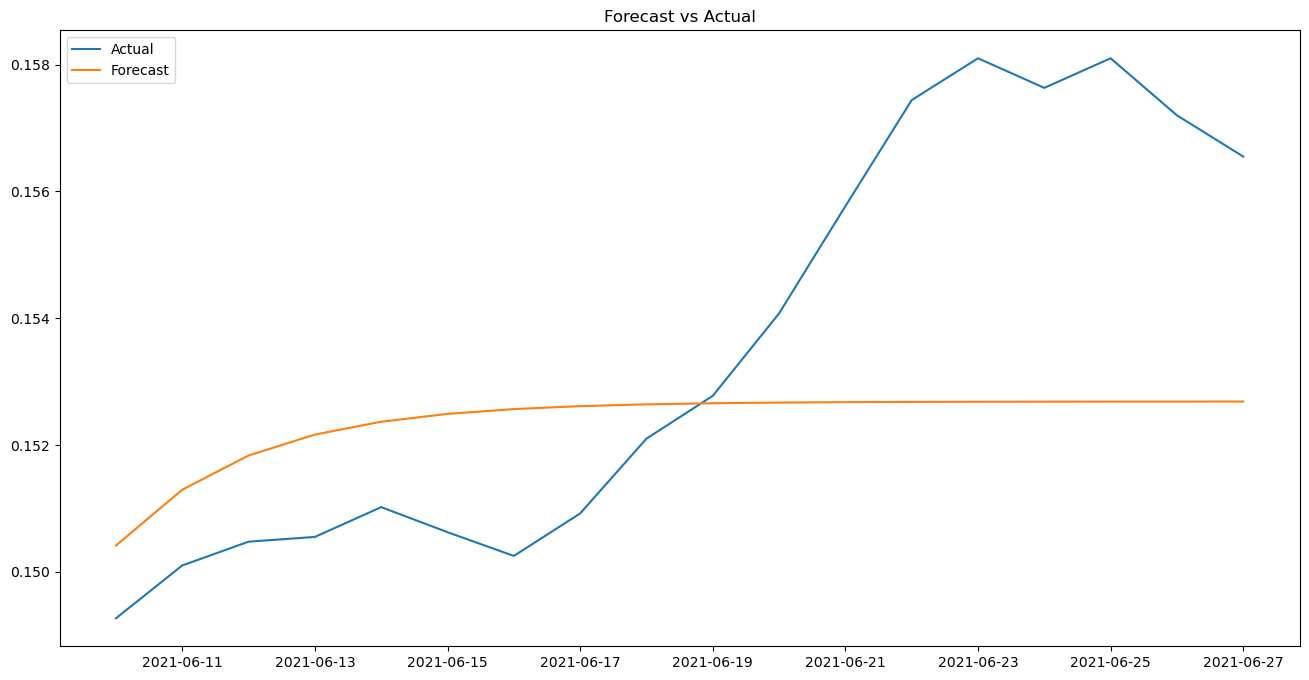

In [21]:
step = 18

# fc = pd.Series(fc, index=test[:step].index)
# print(fc)
plt.figure(figsize=(16, 8))

plt.plot(test[:step], label="Actual")

plt.plot(prediction, label="Forecast")

plt.title("Forecast vs Actual")
plt.legend(loc="upper left")
plt.show()

## R2 Score

In [22]:
test_df = pd.DataFrame(test)
test_df
# test['predicted_prices'] = prediction

,Price
Time,
2021-06-10,0.149267
2021-06-11,0.150100
2021-06-12,0.150475
2021-06-13,0.150550
2021-06-14,0.151020
2021-06-15,0.150625
2021-06-16,0.150250
2021-06-17,0.150920
2021-06-18,0.152100


In [23]:
test_df['predicted_prices'] = prediction
test_df = test_df.dropna()
test_df

,Price,predicted_prices
Time,,
2021-06-10,0.149267,0.150414
2021-06-11,0.150100,0.151295
2021-06-12,0.150475,0.151834
2021-06-13,0.150550,0.152165
2021-06-14,0.151020,0.152367
2021-06-15,0.150625,0.152491
2021-06-16,0.150250,0.152566
2021-06-17,0.150920,0.152613
2021-06-18,0.152100,0.152641


In [24]:
r2_score(test_df['Price'], test_df['predicted_prices'])

0.060208560779383746

In [25]:
np.sqrt(mean_squared_error(test_df['Price'], test_df['predicted_prices']))

0.0031065737617545514

In [26]:
test_df.predicted_prices.describe()

count    18.000000
mean      0.152361
std       0.000611
min       0.150414
25%       0.152398
50%       0.152650
75%       0.152682
max       0.152686
Name: predicted_prices, dtype: float64

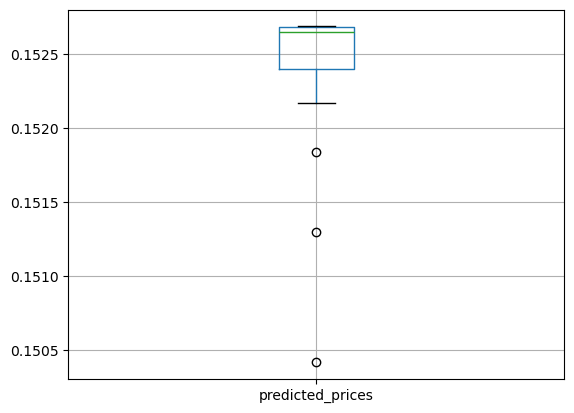

In [27]:
test_df.boxplot(column=['predicted_prices'])
plt.show()